In [1]:
import fasttext
import pandas as pd
import re

from sklearn.manifold import TSNE
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import statsmodels.stats.inter_rater as irr
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.express as px


In [2]:

model = fasttext.load_model('/home/julita/Desktop/semestr2/NLP/cc.pl.300.bin')

In [3]:
df = pd.read_excel('cyberbullying_train_words_noun.xlsx')
df

,nouns,label1,label2,label3,SUPERanotator,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,LUDZIE,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RESTAURACJA,1.0,1.0,1.0,1.0,NaN,NaN,do 200 wszystkie,NaN,NaN,2. Anotacja według semantyki (znaczenia)\nOsob...,NaN
2,pomoc,2.0,2.0,2.0,2.0,NaN,NaN,od 201 do 300 Iza,NaN,NaN,NaN,NaN
3,świat,3.0,3.0,3.0,3.0,NaN,NaN,później jakoś tam,NaN,NaN,NaN,NaN
4,kurtkę,1.0,1.0,1.0,1.0,NaN,NaN,od 301 do 400 Julita,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
628,inwestor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
629,wycofał,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,slabo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
631,dzieci,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_for_analysis = df[['nouns', 'SUPERanotator']][:601]
df_for_analysis.columns = ['nouns', 'labels']

In [5]:
df_for_analysis['labels'].unique()

array([ 0.,  1.,  2.,  3., nan])

# Kappa-Cohen, Kappa-Fleissa

In [6]:
from sklearn.metrics import cohen_kappa_score
from statsmodels.stats.inter_rater import fleiss_kappa

In [7]:
df_part1 = df[:100].iloc[:,  :-2]
df_part2 = df[101:198].iloc[:,  :-2].reset_index()

In [8]:
kappa_cohen_1_2 = cohen_kappa_score(df_part1['label1'], df_part1['label2'])
kappa_cohen_1_3 = cohen_kappa_score(df_part1['label1'], df_part1['label3'])
kappa_cohen_2_3 = cohen_kappa_score(df_part1['label2'], df_part1['label3'])
mean_part1 = (kappa_cohen_1_2  + kappa_cohen_1_3 + kappa_cohen_2_3 )/3

print("Kappa-Cohen (label1, label2):", kappa_cohen_1_2)
print("Kappa-Cohen (label1, label3):", kappa_cohen_1_3)
print("Kappa-Cohen (label2, label3):", kappa_cohen_2_3)
print("Kappa-Cohen mean part1:", mean_part1)

Kappa-Cohen (label1, label2): 0.8543335761107065
Kappa-Cohen (label1, label3): 0.855595667870036
Kappa-Cohen (label2, label3): 0.9473129610115911
Kappa-Cohen mean part1: 0.8857474016641111


In [9]:
kappa_cohen_1_2_2 = cohen_kappa_score(df_part2['label1'], df_part2['label2'])
kappa_cohen_1_3_2 = cohen_kappa_score(df_part2['label1'], df_part2['label3'])
kappa_cohen_2_3_2 = cohen_kappa_score(df_part2['label2'], df_part2['label3'])
mean_part2 = (kappa_cohen_1_2_2  + kappa_cohen_1_3_2 + kappa_cohen_2_3_2 )/3

print("Kappa-Cohen (label1, label2):", kappa_cohen_1_2_2)
print("Kappa-Cohen (label1, label3):", kappa_cohen_1_3_2)
print("Kappa-Cohen (label2, label3):", kappa_cohen_2_3_2)
print("Kappa-Cohen mean part 2:", mean_part2)

Kappa-Cohen (label1, label2): 0.9446978335233751
Kappa-Cohen (label1, label3): 0.8876881512929371
Kappa-Cohen (label2, label3): 0.8697237145049885
Kappa-Cohen mean part 2: 0.9007032331071002


In [10]:
val_part1 = [kappa_cohen_1_2, kappa_cohen_1_3, kappa_cohen_2_3, mean_part1]
val_part2 = [kappa_cohen_1_2_2, kappa_cohen_1_3_2, kappa_cohen_2_3_2, mean_part2]

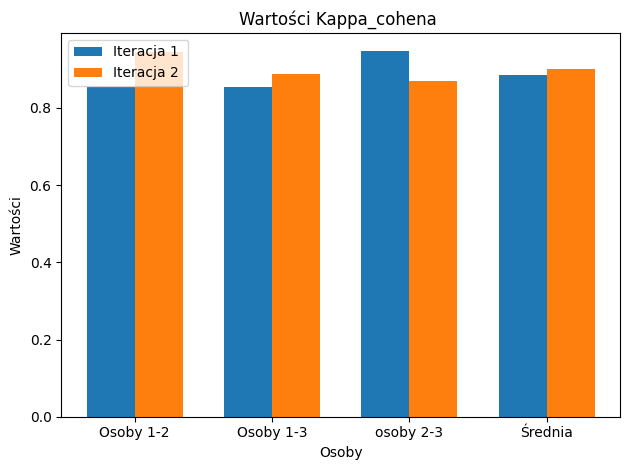

In [11]:
zestawy = ['Osoby 1-2', 'Osoby 1-3', 'osoby 2-3', 'Średnia']
ind = np.arange(len(zestawy))  
szerokość = 0.35  

fig, ax = plt.subplots()

bar1 = ax.bar(ind - szerokość/2, val_part1, szerokość, label='Iteracja 1 ')
bar2 = ax.bar(ind + szerokość/2, val_part2, szerokość, label='Iteracja 2')

ax.set_xlabel('Osoby')
ax.set_ylabel('Wartości')
ax.set_title('Wartości Kappa_cohena ')
ax.set_xticks(ind)
ax.set_xticklabels(zestawy)
ax.legend()

plt.tight_layout()
plt.show()

In [12]:

contingency_matrix1 = np.zeros((len(df_part1), 4), dtype=int)

for i in range(len(df_part1)):
    contingency_matrix1[i, int(df_part1['label1'][i])] += 1  
    contingency_matrix1[i, int(df_part1['label2'][i])] += 1  
    contingency_matrix1[i, int(df_part1['label3'][i])] += 1  

fleiss_kappa1 = irr.fleiss_kappa(contingency_matrix1, method='fleiss')


contingency_matrix2 = np.zeros((len(df_part2), 4), dtype=int)

for i in range(len(df_part2)):
    contingency_matrix2[i, int(df_part2['label1'][i])] += 1  
    contingency_matrix2[i, int(df_part2['label2'][i])] += 1  
    contingency_matrix2[i, int(df_part2['label3'][i])] += 1  

fleiss_kappa2 = irr.fleiss_kappa(contingency_matrix2, method='fleiss')


/tmp/ipykernel_20848/4119753856.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Part', y='Kappa Score', data=df, palette='Blues')


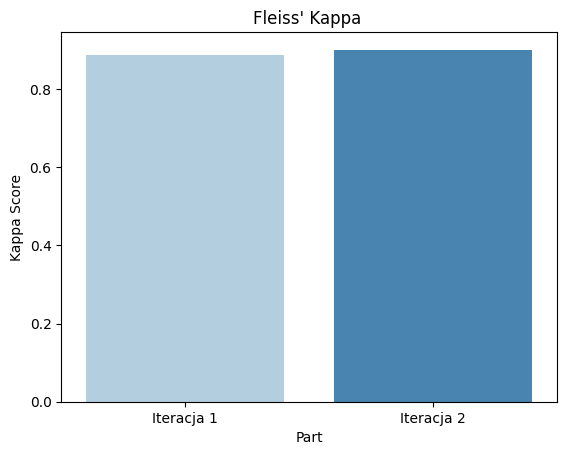

In [13]:
df = pd.DataFrame({
    'Part': ['Iteracja 1', 'Iteracja 2'],
    'Kappa Score': [fleiss_kappa1, fleiss_kappa2]
})

sns.barplot(x='Part', y='Kappa Score', data=df, palette='Blues')

plt.title('Fleiss\' Kappa ')
plt.ylabel('Kappa Score')
plt.show()


# CZĘŚĆ 2

In [14]:
def clean_text(text):
    text = re.sub(r'@anonymized_account', '', text)
    text = re.sub(r'RT', '', text)
    # text = re.sub(r'[^\x00-\x7F]+', '', text)
    # text = re.sub(r'\s+', ' ', text).strip()
    return text

In [15]:
df_for_analysis['nouns'] = df_for_analysis['nouns'].apply(clean_text)
df_for_analysis

,nouns,labels
0,LUDZIE,0.0
1,RESTAURACJA,1.0
2,pomoc,2.0
3,świat,3.0
4,kurtkę,1.0
...,...,...
596,Mistrzowie,0.0
597,branża,2.0
598,mirda,2.0
599,kubeł,1.0


In [16]:
df_for_analysis['embedding'] = df_for_analysis['nouns'].apply(lambda x: model.get_sentence_vector(x))

# FASTTEXT

In [17]:

X = np.array(list(df_for_analysis['embedding']))

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_standardized)

df_tsne = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_tsne['label'] = df_for_analysis['labels']
df_tsne['text'] = df_for_analysis['nouns']

fig = px.scatter(df_tsne, x='x', y='y', color='label', hover_data=['text'], title='TSNE dla FastText dla słów')
fig.show()

In [18]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
df_tsne['cluster'] = clusterer.fit_predict(X_embedded)

fig = px.scatter(df_tsne, x='x', y='y', color='cluster', hover_data=['text'], title='HDBSCAN')
fig.show()


# Podobne słowa

In [19]:
def get_similar_words(model, word, top_n=10):
    """Funkcja do pobierania k-najbardziej podobnych słów."""
    neighbors = model.get_nearest_neighbors(word, k=top_n)
    return [(neighbor[1], neighbor[0]) for neighbor in neighbors]  # (similarity, word)

similar_words_data = []

for word in df_for_analysis['nouns']:
    similar_words = get_similar_words(model, word)
    for similar_word, similarity in similar_words:
        similar_words_data.append({'word': similar_word, 'similarity': similarity, 'source_word': word})



similar_words_df = pd.DataFrame(similar_words_data)
similar_words_df.sort_values(by='source_word', inplace=True)


In [20]:
similar_words_df.to_csv('similar_nouns_fastext.csv')

In [22]:

unique_similar_words = similar_words_df['word'].unique()
embeddings = np.array([model.get_word_vector(word) for word in unique_similar_words])

scaler = StandardScaler()
embeddings_standardized = scaler.fit_transform(embeddings)


X_embedded = TSNE(n_components=2, random_state=42).fit_transform(embeddings_standardized)

df_tsne = pd.DataFrame(X_embedded, columns=['x', 'y'])
df_tsne['word'] = unique_similar_words
df_tsne['source_word'] = similar_words_df.groupby('word')['source_word'].first().values  # Etykiety jako source_word

fig = px.scatter(df_tsne, x='x', y='y', text='word',
                 title='Wizualizacja t-SNE podobnych słów',
                 labels={'source_word': 'Etykieta'},
                 color='source_word',  
                 color_discrete_sequence=px.colors.qualitative.Set1)

fig.update_traces(textposition='top center')

fig.write_html("tsne_visualization.html")

import webbrowser
webbrowser.open("tsne_visualization.html")

fig.show()
